### ATENTION

**Procedures that you must do before run this script!!**

For nice execution for this script, some procedures must do before run. Next Line we'll install h2o package.

After run the next line you'll receive last line looks like this:

**Successfully installed colorama-0.4.3 h2o-3.28.0.3**

In [2]:
pip install h2o

     |████████████████████████████████| 126.2MB 95kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.3-py2.py3-none-any.whl size=126303006 sha256=2b2790fa43265dba4dc953fa30b92a6e7682223b5e6e593540b06aa69f1ca2ee
  Stored in directory: /root/.cache/pip/wheels/fa/7c/ce/95ae52b4d3f1b14a27c3c961c1f94635aee841ab1eec3aeeca
Successfully built h2o


### ATENTION

**Procedures that you must do before run this script!!**

Please, upload the file for your drive before any execution bellow.
Download [here](https://drive.google.com/open?id=1lm7c-TSGqHPlMto3FReHCILtwtqr5QQT) for your local computer and upload to your drive using folder icon left up side of this page.

1.   Click on third icon at left side on top of this page
2.   Click on Upload
3.   Select local file that you uploaded before
4.   Click on X on right side of the word Files to close files window

### Start script

You be able to run all lines above.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline 
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps5iyj4lq
  JVM stdout: /tmp/tmps5iyj4lq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps5iyj4lq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 6 days
H2O cluster name:,H2O_from_python_unknownUser_6lpa8m
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


## Please, don't forget the upload file

**Procedures that you must do before run this script!!**

Please, upload the file for your drive before any execution bellow.
Download [here](https://drive.google.com/open?id=1lm7c-TSGqHPlMto3FReHCILtwtqr5QQT) for your local computer and upload to your drive using folder icon left up side of this page.

1.   Click on third icon at left side on top of this page
2.   Click on Upload
3.   Select local file that you uploaded before
4.   Click on X on right side of the word Files to close files window







In [0]:
dfo = pd.read_excel('data.xls', index_col=0,skiprows=[0])

In [6]:
dfo.rename({'PAY_6': 'Payment_Status_Apr', 
           'PAY_5': 'Payment_Status_May', 
           'PAY_4': 'Payment_Status_Jun', 
           'PAY_3': 'Payment_Status_Jul', 
           'PAY_2': 'Payment_Status_Aug', 
           'PAY_0': 'Payment_Status_Sep',
           'BILL_AMT6': 'Bill_Apr', 
           'BILL_AMT5': 'Bill_May', 
           'BILL_AMT4': 'Bill_Jun',
           'BILL_AMT3': 'Bill_Jul', 
           'BILL_AMT2': 'Bill_Aug', 
           'BILL_AMT1': 'Bill_Sep',
           'PAY_AMT6': 'Payments_Apr', 
           'PAY_AMT5': 'Payments_May', 
           'PAY_AMT4': 'Payments_Jun',
           'PAY_AMT3': 'Payments_Jul', 
           'PAY_AMT2': 'Payments_Aug', 
           'PAY_AMT1': 'Payments_Sep',
           'default payment next month': 'default'}, 
           axis=1, inplace=True)
dfo.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,Payments_Apr,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


I presume that the values from -2 to 0 means the following:

-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)

-1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due

0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance.

See: [Minimum Monthly Payment](https://www.investopedia.com/terms/m/minimum-monthly-payment.asp)

In [7]:
dfo.shape

(30000, 24)

**Verifying Missing Data**

We'll see there is no missing data. It's very important because the treatment of cleaning this one does not needed.

In [9]:
total = dfo.isnull().sum().sort_values(ascending = False)
percent = (dfo.isnull().sum()/dfo.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default,Payments_Apr,SEX,EDUCATION,MARRIAGE,AGE,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,LIMIT_BAL
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Verifying unbalanced classes**

Let's check data unbalance with respect with target value, i.e. **default**.
The data has not a large unbalance with respect of the target value (default), but **Yes**, the classes are unbalanced a little bit, so the parameter that will used on *H2O* must get it using bagging.

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

[Wiki](https://en.wikipedia.org/wiki/Bootstrap_aggregating)

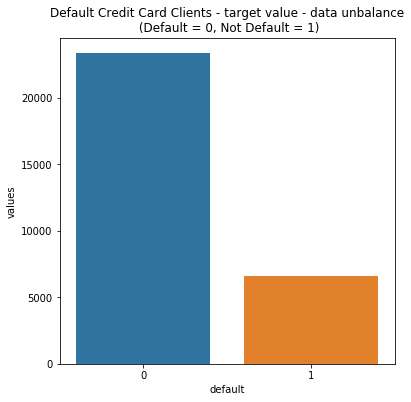

In [10]:
temp = dfo["default"].value_counts()
df = pd.DataFrame({'default': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Now we checking correlations. It is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. Look at the graph bellow to see all correlations between features. There are strong correlations among payments. All others are wekness.

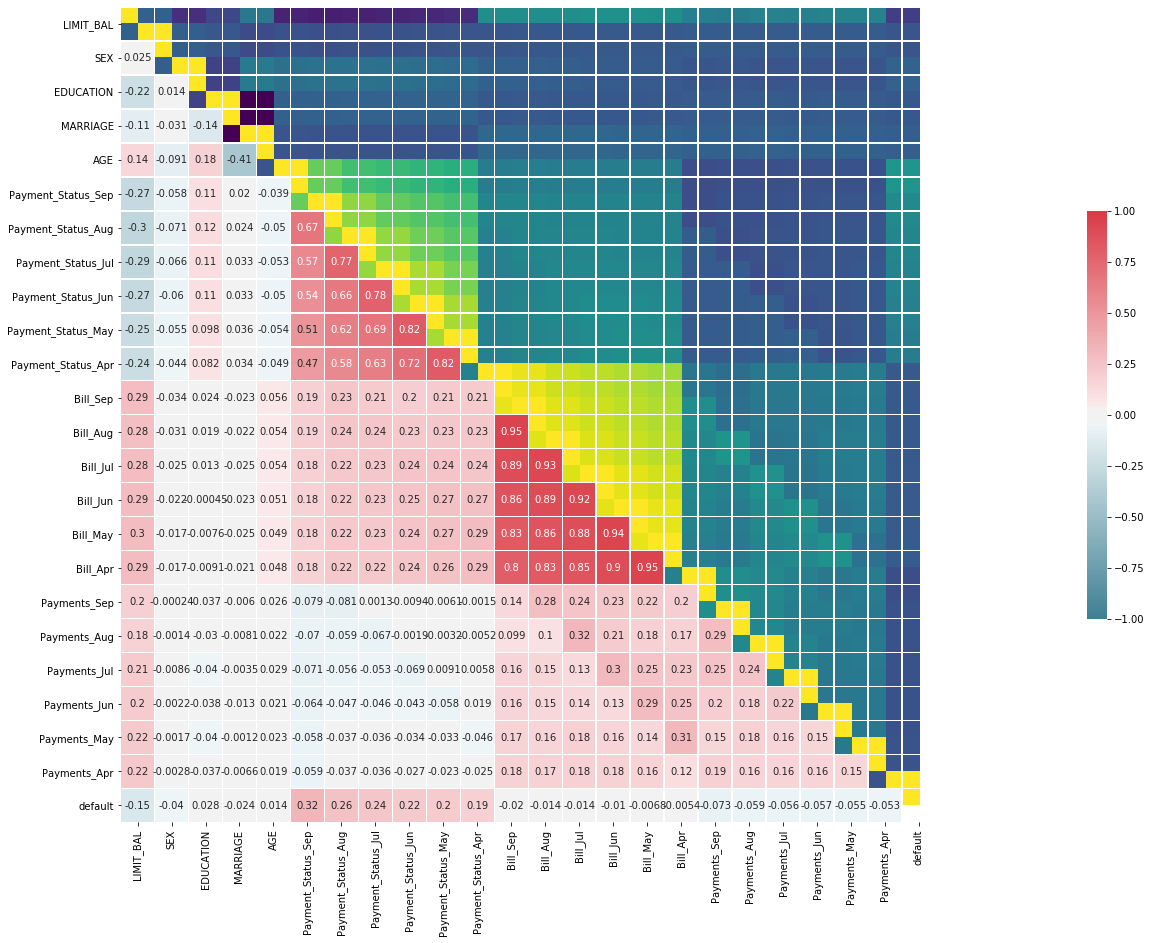

In [8]:
corr = dfo.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(54, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.imshow(corr)

We can see the same fenomenon over pairplot bellow. weakness correlation between most features, but strong correlation among bills and payments.

* For the numeric values, let's represent the features correlation.
* Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
* There are no correlations between amounts of previous payments for April-Sept 2005.
* Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

**See bellow**


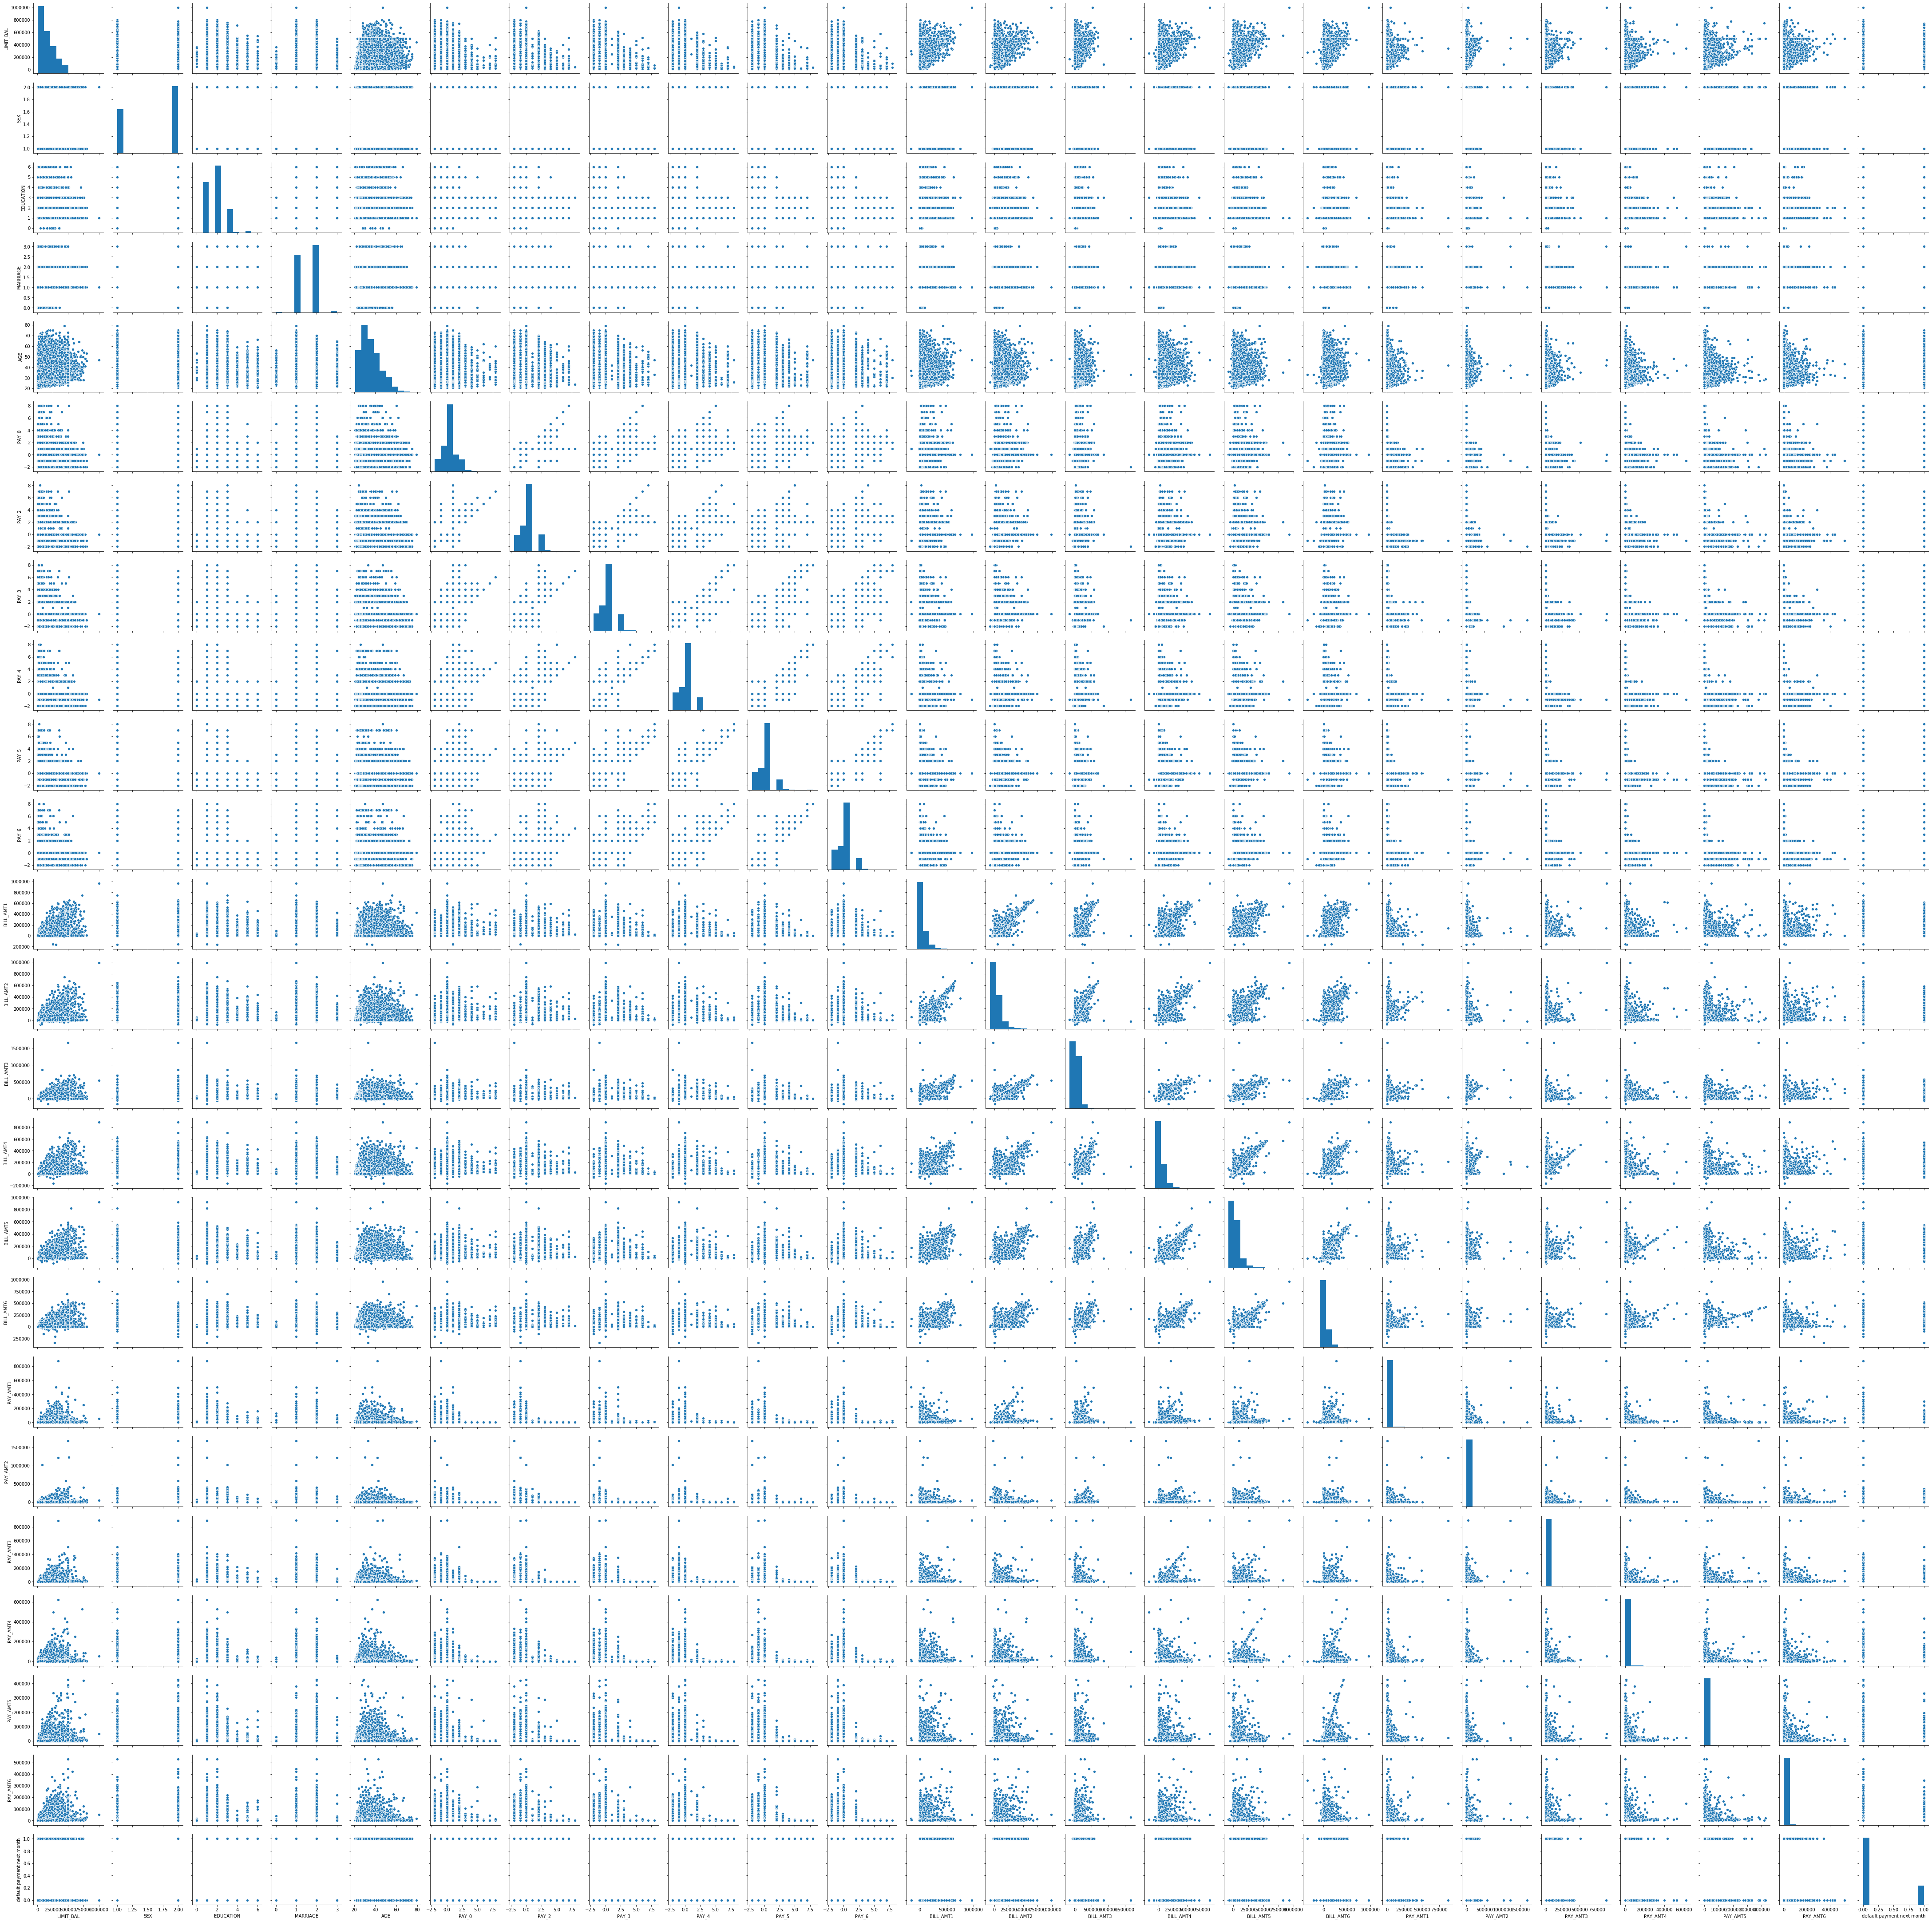

In [0]:
sns.pairplot(dfo)

### Amount of credit limit grouped by default payment next month

Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

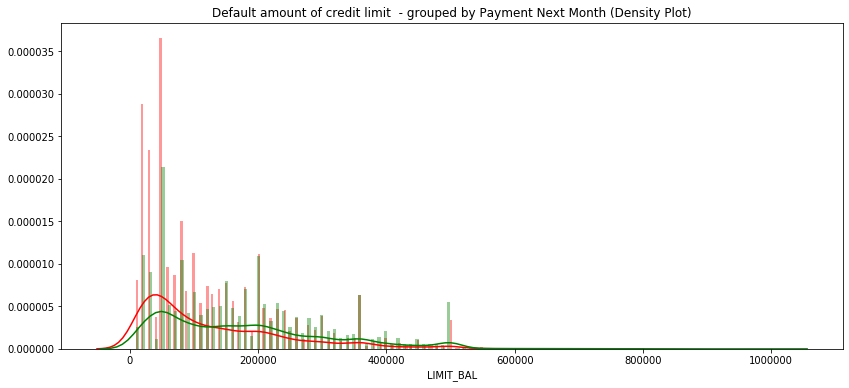

In [12]:
class_0 = dfo.loc[dfo['default'] == 0]["LIMIT_BAL"]
class_1 = dfo.loc[dfo['default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Most of defaults are for credit limits $0-100,000$ (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of $50,000$, $20,000$ and $30,000$.

## Looking for Multicollinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

Values of VIF that exceed $10$ are often regarded as indicating multicollinearity, but in weaker models values above $2.5$ may be a cause for concern.


In [0]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = dfo['default'] # dependent variable
X = dfo.drop('default', axis=1)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [0]:
cols = dfo.columns
cols = cols[cols!='default']
pd.DataFrame(vif,cols,columns=['VIF'])

,VIF
LIMIT_BAL,4.037479
SEX,9.092210
EDUCATION,6.731119
MARRIAGE,6.265388
AGE,10.857679
Payment_Status_Sep,1.918276
Payment_Status_Aug,3.211217
Payment_Status_Jul,3.727427
Payment_Status_Jun,4.440120
Payment_Status_May,4.985856


**Interpretation**

The square root of the variance inflation factor indicates how much larger the standard error increases compared to if that variable had 0 correlation to other predictor variables in the model.

In our Example the variance inflation factor of a predictor variable were $6.731119$ ($√6.731119 = 2.5$), this means that the standard error for the coefficient of that predictor variable is $2.5$ times larger than if that predictor variable had $0$ correlation with the other predictor variables.

**Residual Analysis** 

The difference between the observed value of the dependent variable ($y$) and the predicted value ($ŷ$) is called the residual ($e$). Each data point has one residual.

Residual = Observed value - Predicted value $e = y − ŷ$

Both the sum and the mean of the residuals are equal to zero. That is, $Σ**e = 0$ and $e = 0$.

0.11863331652675246

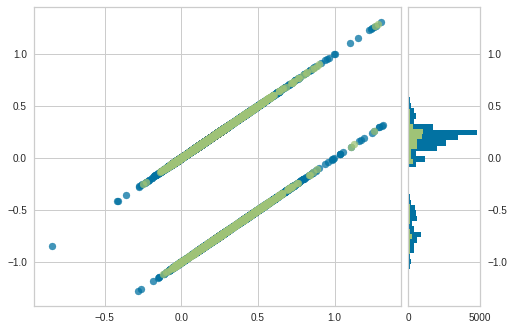

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
Y = dfo["default"]
X = dfo.drop(columns=['default'])

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

Residuals, in the context of regression models, are the difference between the observed value of the target variable ($y$) and the predicted value ($ŷ$), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

A common use of the residuals plot is to analyze the variance of the error of the regressor. The points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around 0.11, which also generally indicates a not so well fitted model.

In [15]:
df = h2o.H2OFrame(dfo)

Parse progress: |█████████████████████████████████████████████████████████| 100%


The parse of data frame to H2O data frame is needed.

In [0]:
df.head()

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,Payments_Apr,default
20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


### Split data into train and testing

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [0]:
train, valid, test = df.split_frame(ratios=[0.7, 0.2], seed=1234)
test['default'] = test['default'].asfactor()

### AutoML: Automatic Machine Learning

The H2O AutoML interface is designed to have as few parameters as possible so that all the user needs to do is point to their dataset, identify the response column and optionally specify a time constraint or limit on the number of total models trained.

In [17]:
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

aml = H2OAutoML(max_models=20, max_runtime_secs=300, seed=1)

y = "default"
x = list(dfo.columns).remove(y)

aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### AutoML Output

The models are ranked by a default metric based on the problem type (the second column of the leaderboard). In binary classification problems, that metric is AUC, and in multiclass classification problems, the metric is mean per-class error. In regression problems, the default sort metric is deviance. 

In [18]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200312_010025,0.132445,0.36393,0.132445,0.264842,0.25493
StackedEnsemble_BestOfFamily_AutoML_20200312_010025,0.132573,0.364105,0.132573,0.265156,0.255019
XGBoost_3_AutoML_20200312_010025,0.132603,0.364147,0.132603,0.268226,0.2553
GBM_1_AutoML_20200312_010025,0.133668,0.365607,0.133668,0.266755,0.256126
GBM_2_AutoML_20200312_010025,0.133726,0.365685,0.133726,0.265742,0.256203
GBM_3_AutoML_20200312_010025,0.13451,0.366756,0.13451,0.266794,0.257021
XGBoost_1_AutoML_20200312_010025,0.134553,0.366814,0.134553,0.267438,0.257915
DRF_1_AutoML_20200312_010025,0.137589,0.37093,0.137589,0.270419,0.261331
XGBoost_2_AutoML_20200312_010025,0.137822,0.371243,0.137822,0.269136,0.262132
GBM_4_AutoML_20200312_010025,0.147246,0.383727,0.147246,0.311417,0.267822


### The Winner

XGBoost is a supervised learning algorithm that implements a process called boosting to yield accurate models. Boosting refers to the ensemble learning technique of building many models sequentially, with each new model attempting to correct for the deficiencies in the previous model. In tree boosting, each new model that is added to the ensemble is a decision tree. XGBoost provides parallel tree boosting (also known as GBDT, GBM) that solves many data science problems in a fast and accurate way. For many problems, XGBoost is one of the best gradient boosting machine (GBM) frameworks today.

[See details](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html)

[AWS](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/cloud-integration/aws.html)

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# function to setup parameters to work with H2O xGBoost Model
def setDRFParam(ntrees=200,                   # number of trees to build in the model
                max_depth=20,                 # aximum depth to which each tree will be built
                balance_classes=True,         # option can be used to balance the class distribution
                sample_rate=0.75,             # used to specify the row (x-axis) sampling rate (without replacement)
                col_sample_rate_per_tree=0.8, # specifies the column sampling rate for each tree (without replacement)
                min_rows=5,                   # minimum number of observations for a leaf in order to split
                seed=3333,                    # random number generator (RNG)
                score_tree_interval=5,        # early stopping and attempting to make early stopping reproducible
                calibrate_model=False,        # specify Platt scaling in DRF to calibrated class probabilities
                categorical_encoding="one_hot_explicit", # encoding scheme to use for handling categorical features
                distribution="bernoulli",     # in our case, the response column must be 2-class categorical
                fold_assignment="auto",       # cross-validation fold - is best for large datasets = auto = random
                histogram_type="auto",        # is commonly used to speed up the split finding process
                nfolds=5):
   
        param = {
              "ntrees" : ntrees                                      
            , "max_depth" : max_depth                                
            , "balance_classes" : balance_classes                    
            , "sample_rate" : sample_rate
            , "col_sample_rate_per_tree" : col_sample_rate_per_tree
            , "min_rows" : min_rows
            , "seed": seed
            , "score_tree_interval": score_tree_interval
            , "calibrate_model": calibrate_model
            , "categorical_encoding": categorical_encoding
            , "distribution": distribution
            , "fold_assignment": fold_assignment
            , "histogram_type": histogram_type
            , "nfolds": nfolds
        }
        return(param)

In [0]:
df['default'] = df['default'].asfactor()
train, valid = df.split_frame(ratios= [.7], seed = 1234)
response = 'default'
predictors = df.columns
histogram_type = 'auto'
categorical_encoding = 'auto'


Changing parameter *ntrees* to $50$ and *max_depth* to $20$ 

In [21]:
param = setDRFParam(ntrees=50, max_depth=20,histogram_type=histogram_type,categorical_encoding=categorical_encoding)
model_xGBoost50 = H2OGradientBoostingEstimator(**param)
model_xGBoost50.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Changing parameter *ntrees* to $200$ and *max_depth* to $40$
We can try many configurations using a loop for many values starting on $50$ to $600$ to see what the best results. For while in this experiment we try only two.

In [22]:
param = setDRFParam(ntrees=200, max_depth=40,histogram_type=histogram_type,categorical_encoding=categorical_encoding)
model_xGBoost200 = H2OGradientBoostingEstimator(**param)
model_xGBoost200.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


### Writing models to get access late

When saving an H2O binary model with *h2o.save_model*, or in Flow, you will only be able to load and use that saved binary model with the same version of H2O that you used to train your model.

In [0]:
import os

model_path = h2o.save_model(model=model_xGBoost50, path='.', force=True)
os.rename(model_path,os.path.split(model_path)[0]+'/xGBoost50')
model_path = h2o.save_model(model=model_xGBoost200, path='.', force=True)
os.rename(model_path,os.path.split(model_path)[0]+'/xGBoost200')


In [0]:
def showModel(modelImp,Var_Importance,Confusion_Matrix,Cross_Validation,Range):
    model = h2o.load_model(modelImp)
    if Confusion_Matrix:
        print(model.confusion_matrix())

    if Var_Importance:
        model.varimp_plot()
    else:
        varimpDF = model.varimp(True)
        print(varimpDF[varimpDF['scaled_importance'] >= Range])

    if Cross_Validation:
        print(model.cross_validation_metrics_summary())

In [0]:
models = ['xGBoost50','xGBoost200']

### Performance Model

H2O-3 provides a variety of metrics that can be used for evaluating supervised and unsupervised models. The metrics for this section only cover supervised learning models, which vary based on the model type (classification or regression). At this time, we show just classification performance.



### For model model_xGBoost50

In [35]:
print('F1      : ', model_xGBoost50.F1().value)
print('Accuracy: ', model_xGBoost50.accuracy().value)


F1      :  0.999272991639404
Accuracy:  0.9992716899827027


For model model_xGBoost200

In [36]:
print('F1      : ', model_xGBoost200.F1().value)
print('Accuracy: ', model_xGBoost200.accuracy().value)


F1      :  0.9996667171640661
Accuracy:  0.999666191242072


### Using Interact

The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

In [27]:
interact(showModel,modelImp=models,Var_Importance=True,Confusion_Matrix=False,Cross_Validation=False,Range=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1))

interactive(children=(Dropdown(description='modelImp', options=('xGBoost50', 'xGBoost200'), value='xGBoost50')…

<function __main__.showModel>

## Other Aproach

### Support Vector Machines

Other prossible aproach is SVN. Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines :

*   Still effective in cases where number of dimensions is greater than the number of samples.
*   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
*   Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

*   If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

*   SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

**Why we do this?**

To see how this algorithm works compared with we have done so far.

In [37]:
from sklearn.svm import SVC
#Get Target data 
y = dfo['default']

#Load X Variables into a Pandas Dataframe with columns 
X = dfo.drop(['default'], axis = 1)

SVM_Model = SVC(gamma='auto')
SVM_Model.fit(X,y)

Accuracy - : 0.993133


### Model Performance

For SVM Model


In [39]:
print(f'Accuracy - : {SVM_Model.score(X,y):.6f}')

Accuracy - : 0.993133
